# Exploratory Data Analysis - Lending Club

## Goal of the Analysis

<font color = blue >To explore the given data and identify the correlation, facts, patterns, 
driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default

Utilise this knowledge for its portfolio, risk assessment and identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss </font>

## Data Cleaning and Massaging

In [85]:
# importing libraries

import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

#Setting the options for easy understanding
pd.options.display.float_format = '{:.2f}'.format


In [86]:
# Sourcing Data
lc_df = pd.read_csv(r'.\Data\loan.csv',dtype = 'object')
lc_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


### Fixing columns

    1) Calculating column's missing percentage 
    2) Removing columns with high NA percentage
    3) Removing Columns with only one unique values which are not having real predictive power
    4) Removing columns which are not having real predictive power
    5) Removing the post loan attributes, these are basically generated post loan
    
 ## Few Assumptions

* Variables like id, member_id, grade, url etc. will not be of any help in current analysis so can be removed from dataset.

* Variables like collection_recovery_fee, recoveries, total_pymnt, total_pymnt_inv, total_rec_prncp etc. which are normally captured after a loan is accepted and are not normally available at the time of loan application. So these type of variables can be removed from the dataset as will not be of any help in current analysis.

In [87]:
# Calculating column's missing percentage 
missing_col_per = (round(100 * (lc_df.isnull().sum() /  lc_df.shape[0]),2))

# Removing columns with high NA percentage
empty_Columns = lc_df.columns[missing_col_per > 60]
lc_df.drop(empty_Columns, axis = 1, inplace = True)

# Removing Columns with only one unique values which are not having real predictive power
lc_df.drop(lc_df.columns[lc_df.nunique(axis = 0)==1], axis = 1, inplace = True)

# Removing columns which are not having real predictive power
lc_df.drop(['id','member_id','desc','url','zip_code'], axis = 1,inplace = True)

# Removing the post loan attributes, these are basically generated post loan
lc_df.drop(['out_prncp_inv','total_pymnt','out_prncp','total_pymnt_inv', 'total_rec_prncp',
            'total_rec_int', 'total_rec_late_fee', 'recoveries','collection_recovery_fee', 
            'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d','revol_bal','revol_util'], axis = 1,inplace = True)

# Calculating missing percentage
missing_col_per = (round(100 * (lc_df.isnull().sum() /  lc_df.shape[0]),2))
missing_col_per[missing_col_per.values > 0].sort_values()


title                  0.03
pub_rec_bankruptcies   1.75
emp_length             2.71
emp_title              6.19
dtype: float64

### Fixing Rows

In [88]:
# There are some values in the employee title as na, we assume that they are self employed applicants
lc_df.loc[lc_df.emp_title.isnull(),'emp_title']  = 'Self Employed' 

# There are some values in the employee length as na, we assume that they are self employed applicants
lc_df.loc[lc_df.emp_length.isnull(),'emp_length'] = 0

In [89]:
# Percentage of data loss when removing rows which are having null values
100 * ((lc_df.isnull().sum(axis=1))>=1).sum() / lc_df.shape[0]

1.7826119797567792

In [90]:
# since the data loss is less than 5 percentage droping the rows with null values
lc_df  = lc_df[~(lc_df.isnull().any(axis=1))]

### Standardising Values

#### Remove % from int_rate column
#### Cast columns to numeric to find the correlation


In [91]:
# Remove percentange in intrest rate column
lc_df.int_rate = lc_df.int_rate.astype(str).str.replace('%','')

# Cast columns to numeric to find the correlation
numeric_columns =  ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment',
                    'annual_inc','dti','delinq_2yrs','inq_last_6mths']

lc_df[numeric_columns] = lc_df[numeric_columns].apply(pd.to_numeric)
lc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39009 entries, 0 to 39680
Data columns (total 26 columns):
loan_amnt               39009 non-null int64
funded_amnt             39009 non-null int64
funded_amnt_inv         39009 non-null float64
term                    39009 non-null object
int_rate                39009 non-null float64
installment             39009 non-null float64
grade                   39009 non-null object
sub_grade               39009 non-null object
emp_title               39009 non-null object
emp_length              39009 non-null object
home_ownership          39009 non-null object
annual_inc              39009 non-null float64
verification_status     39009 non-null object
issue_d                 39009 non-null object
loan_status             39009 non-null object
purpose                 39009 non-null object
title                   39009 non-null object
addr_state              39009 non-null object
dti                     39009 non-null float64
delinq_2yrs   

In [92]:
lc_df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths
count,39009.00,39009.00,39009.00,39009.00,39009.00,39009.00,39009.00,39009.00,39009.00
mean,11242.46,10968.28,10541.90,12.05,324.62,68962.84,13.36,0.15,0.87
std,7473.14,7201.09,7104.63,3.74,208.88,63163.29,6.67,0.49,1.07
min,500.00,500.00,0.00,5.42,16.08,4000.00,0.00,0.00,0.00
25%,5500.00,5400.00,5000.00,9.25,167.11,40800.00,8.23,0.00,0.00
50%,10000.00,9675.00,9000.00,11.86,280.02,59000.00,13.45,0.00,1.00
75%,15000.00,15000.00,14475.49,14.61,430.78,82404.00,18.63,0.00,1.00
max,35000.00,35000.00,35000.00,24.59,1305.19,6000000.00,29.99,11.00,8.00


# UniVariate Analysis

In [93]:
# UserDefined Functions
def uni_continuos_plot(df,column):
    #sns.set_palette("")
    fig, ax = plt.subplots(figsize=(10,5))
    fig.suptitle("Spread and central Tendency of " + column)
    sns.violinplot(data =lc_df, x=column, inner="quartile")
    plt.show()


### Purpose of Loan

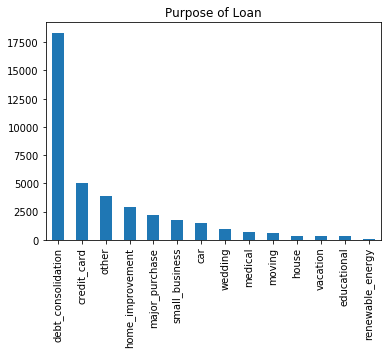

In [94]:
lc_df['purpose'].value_counts().plot.bar()
plt.title('Purpose of Loan')
plt.show()


<font color = blue> Most of the loan seeking reason is to pay the other debts(debt_consolidation) </font>

<font color = blue> As we are not aware what come under other, we are removing this category(Rows) as well </font>


In [95]:
lc_df = lc_df.loc[~(lc_df['purpose']=='other')]

### Home OwnerShip

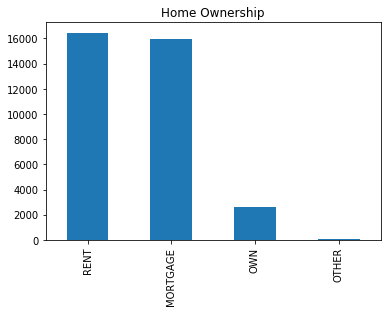

In [96]:
lc_df['home_ownership'].value_counts().plot.bar()
plt.title('Home Ownership')
plt.show()


<font color = blue> Most of the loan seeking applicants are staying in rented house </font>

<font color = blue> As we are not aware what come under other, we are removing this category(Rows) as well </font>


In [97]:
lc_df = lc_df.loc[~(lc_df['home_ownership']=='OTHER')]

### Loan Amount

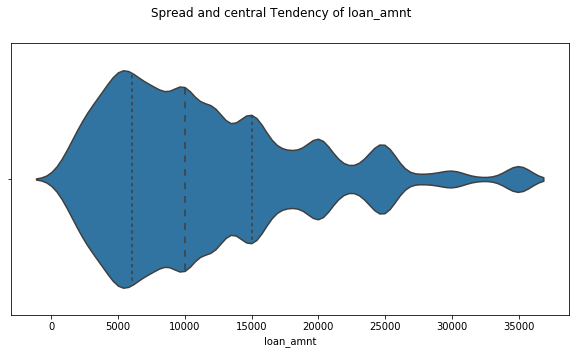

In [98]:
uni_continuos_plot(lc_df,'loan_amnt')

<font color = blue> Insights: Most of the loan amount are 6000 to 15000 and we don't have more Outliers

### Interest Rate

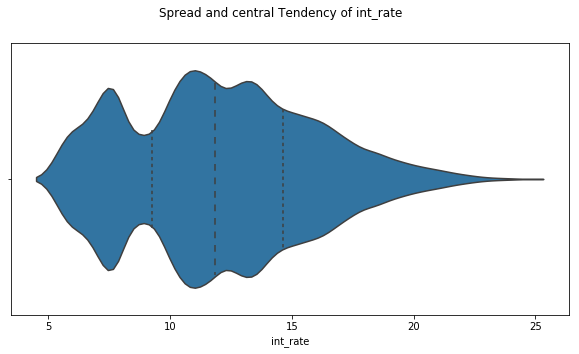

In [99]:
uni_continuos_plot(lc_df,'int_rate')

<font color = blue> Insights: Most of the loan intrest are distributed between 9 to 15 and we don't have more Outliers

### Loan Status

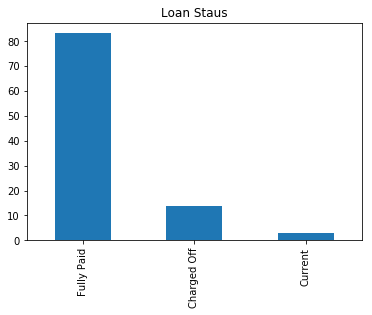

In [100]:
fig, ax = plt.subplots()
(100*lc_df.loan_status.value_counts() /len(lc_df.loan_status)).plot.bar()
plt.title('Loan Staus')
plt.show()

<font color = blue> Insights: 14 % applicants chargedoff

### Loan Term

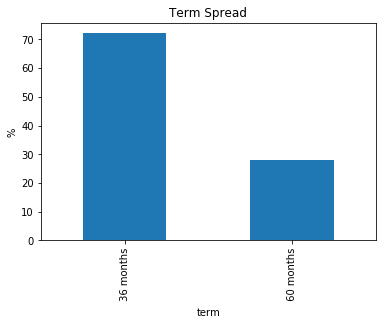

In [101]:
fig, ax = plt.subplots()
(100*lc_df.term.value_counts() /len(lc_df.term)).plot.bar()
plt.title('Term Spread')
plt.xlabel('term')
plt.ylabel('%')
plt.show()


<font color = blue> Insights: 70% of pepole applied loan with 36 month term period

### Annual Income

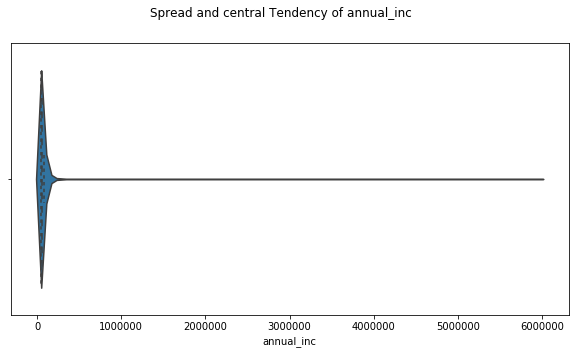

In [102]:
uni_continuos_plot(lc_df,'annual_inc')

<font color =blue>_Now we can clearly see that annual _inc columns contains many outliers, So we can remove the ourliers from annual _inc column_</font>

In [103]:
np.percentile(lc_df['annual_inc'],[80,85,90,95,99])

array([ 90000. , 100000. , 117004.2, 143000. , 235000. ])

### Handling Outliers

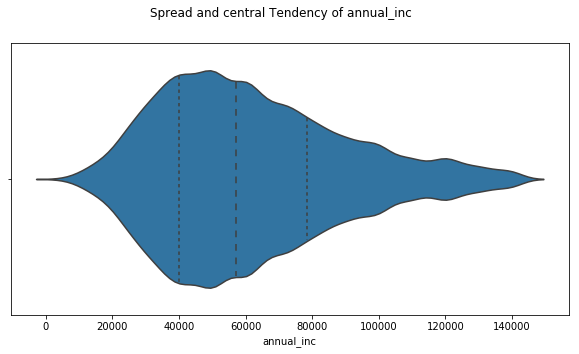

In [104]:
lc_df = lc_df[lc_df['annual_inc'] < lc_df['annual_inc'].quantile(0.95)]
uni_continuos_plot(lc_df,'annual_inc')

<font color = blue> Insights: Most of the applicants earn between 40000 to 75000 annualy

## Derived Metrics

### Creating column for reference and Analysis

##### Type Driven - Create new column interest_rate_range

Define range for interest rate to see how each range is performing against loan status

In [105]:
# Bins for Loan Amount
bins = [0,5000,10000,15000,20000,25000,30000,35000,40000]
label = ['0-5000','5000-10000','10000-15000','15000-20000','20000-25000',
         '25000-30000','30000-35000', '35000 and above']
lc_df['loan_amnt_range']  = pd.cut(lc_df['loan_amnt'],bins, labels = label)

# Bins for dti
bins = [0,10,20,30,40,50]
label = ['0-10','10-20','20-30','30-40','40 and above']
lc_df['dti_range']  = pd.cut(lc_df['dti'],bins, labels = label)

# Bins for intreset Rate
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
lc_df['int_rate_range'] = pd.cut(lc_df['int_rate'], bins, labels=slot)

# Bins for AnnualIncome
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
lc_df['annual_inc_range'] = pd.cut(lc_df['annual_inc'], bins, labels=slot)

##### Business Driven - Create new columns loan_default_category

Lets define a new variable loan_default_category which categorises the loan_status into 2 categories:
"Defaulter" (if loan status is "charged off") and
"Non-Defaulter" (if loan status is "Fully Paid" or "Current")

In [106]:
# Column for defaluted or not, where 0 is notdefaulted and 1 is defaulted
lc_df.loc[lc_df['loan_status']== 'Charged Off','Status'] = 'Defaulted'
lc_df['Status'].fillna('Not Defaulted', inplace = True)

# Column for defaluted or not, where 0 is notdefaulted and 1 is defaulted
lc_df.loc[lc_df['pub_rec_bankruptcies']== '0','BankRuptcy_Status'] = 'No History of BankRuptcy'
lc_df['BankRuptcy_Status'].fillna('History of BankRuptcy', inplace = True)

# Loan Issue Month as seprate Column
lc_df['issue_month'] = lc_df['issue_d'].str.split('-').str[0]

# Loan Issue Year as seprate Column
lc_df['issue_year'] = '20' + lc_df['issue_d'].str.split('-').str[1]

### Segmented univariate Analysis

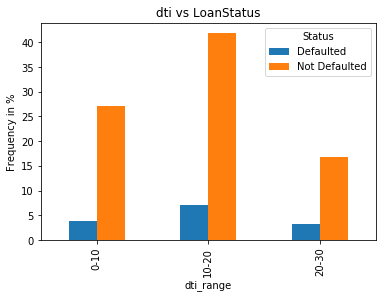

In [107]:
#dti vs defaulted

Group = lc_df.groupby(['dti_range','Status'])
t = pd.DataFrame(Group.Status.count())

t.rename(columns={'Status':'Count'},inplace = True)

t.reset_index(inplace=True)

t['Count'] = 100 * (t['Count'] / t.Count.sum() )

t.pivot(index = "dti_range", columns = "Status", values = "Count").plot.bar()
plt.ylabel('Frequency in %')
plt.title('dti vs LoanStatus')
plt.show()


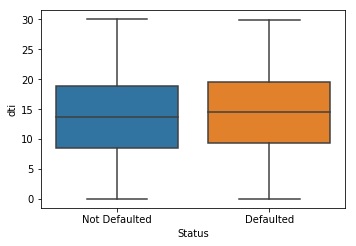

Defaulters have more debt to income ratio.


In [108]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x="Status", y="dti", data=lc_df)
plt.show()

print("Defaulters have more debt to income ratio.")

<font color = blue> Insights: Loan Defaults happened in Range of 10 to 20 and Defaulters debt to income ratio mean is high

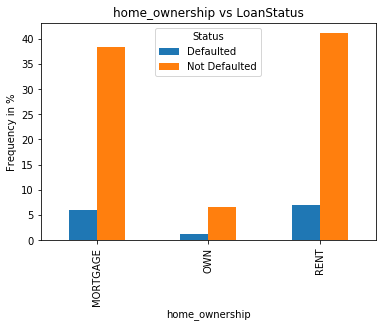

In [109]:
#HomeOwnership vs Defaulted

Group = lc_df.groupby(['home_ownership','Status'])
t = pd.DataFrame(Group.Status.count())
t.rename(columns={'Status':'Count'},inplace = True)

t.reset_index(inplace=True)
t['Count'] = 100 * (t['Count'] / t.Count.sum() )
t.pivot(index = "home_ownership", columns = "Status", values = "Count").plot.bar()
plt.ylabel('Frequency in %')
plt.title('home_ownership vs LoanStatus')
plt.show()

<font color = blue> Insights: Most defaultors are in Rented Home

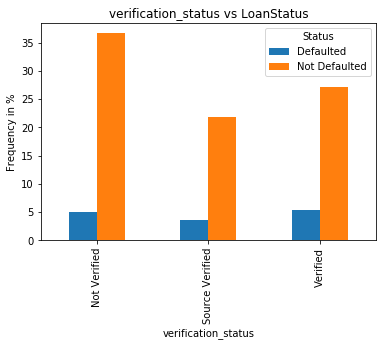

In [110]:
#Verification status vs Defaulted

Group = lc_df.groupby(['verification_status','Status'])
t = pd.DataFrame(Group.Status.count())
t.rename(columns={'Status':'Count'},inplace = True)

t.reset_index(inplace=True)
t['Count'] = 100 * (t['Count'] / t.Count.sum() )
t.pivot(index = "verification_status", columns = "Status", values = "Count").plot.bar()
plt.ylabel('Frequency in %')
plt.title('verification_status vs LoanStatus')
plt.show()

<font color = blue> Insights: No major Significant identified

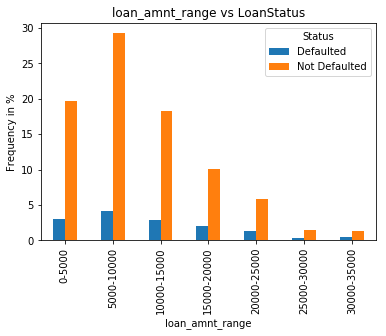

In [111]:
# loan_amnt_range vs Defaulted
Group = lc_df.groupby(['loan_amnt_range','Status'])
t = pd.DataFrame(Group.Status.count())
t.rename(columns={'Status':'Count'},inplace = True)

t.reset_index(inplace=True)
t['Count'] = 100 * (t['Count'] / t.Count.sum() )
t.pivot(index = "loan_amnt_range", columns = "Status", values = "Count").plot.bar()
plt.ylabel('Frequency in %')
plt.title('loan_amnt_range vs LoanStatus')
plt.show()

<font color = blue> Insights: Most of the defaults happens in Loan amount between 5000 to 100000

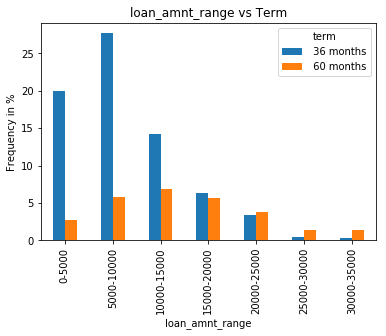

In [112]:
# loan_amnt_range vs Term
Group = lc_df.groupby(['loan_amnt_range','term'])
t = pd.DataFrame(Group.term.count())
t.rename(columns={'term':'Count'},inplace = True)

t.reset_index(inplace=True)
t['Count'] = 100 * (t['Count'] / t.Count.sum() )
t.pivot(index = "loan_amnt_range", columns = "term", values = "Count").plot.bar()
plt.ylabel('Frequency in %')
plt.title('loan_amnt_range vs Term')
plt.show()


<font color = blue> Insights: For lower Loan amount People prefer 36 Months Term

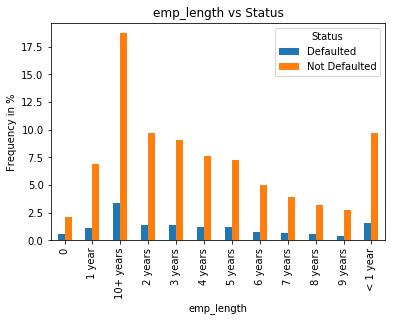

In [113]:
# Emploment length vs defaultors
Group = lc_df.groupby(['emp_length','Status'])
t = pd.DataFrame(Group.Status.count())
t.rename(columns={'Status':'Count'},inplace = True)

t.reset_index(inplace=True)
t['Count'] = 100 * (t['Count'] / t.Count.sum() )
t.pivot(index = "emp_length", columns = "Status", values = "Count").plot.bar()
plt.ylabel('Frequency in %')
plt.title('emp_length vs Status')
plt.show()


<font color = blue> Insights: Lower Experience employees tend to default more on loan payment than higher experience with respect to probability

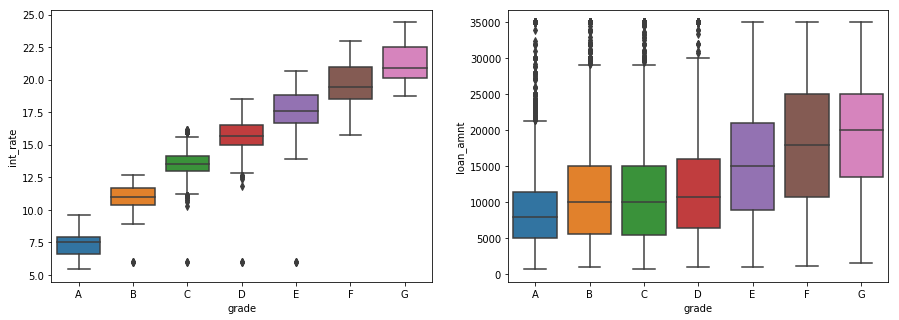

In [114]:
#Grade vs Intreset Rate
#Grade vs Loan Amount


fig,ax = plt.subplots(1,2, figsize= (15,5))

sns.boxplot(x ='grade', y = 'int_rate',data=lc_df.sort_values(by = 'grade'), ax = ax[0])
sns.boxplot(x ='grade', y = 'loan_amnt',data=lc_df.sort_values(by = 'grade'), ax = ax[1])
plt.show()


<font color = blue> Insights: As the grade Increase the Intrest Rate also Increases.
    
  <font color = blue> As the Loan Amount is high Grade increases and interest rate is also high 

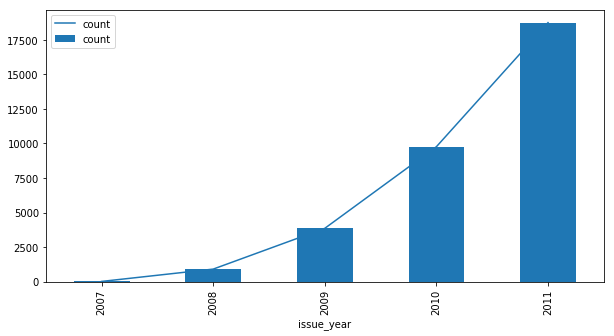

In [115]:
#Year wise Loan
year_wise =lc_df.groupby(by= [lc_df.issue_year])[['loan_status']].count()
year_wise.rename(columns={"loan_status": "count"},inplace=True)
ax =year_wise.plot(figsize=(10,5))
year_wise.plot(kind='bar',figsize=(10,5),ax = ax)
plt.show()

<font color = blue> Insights: Number of applicants doubles every year

### BiVariate / MultiVariate Analysis

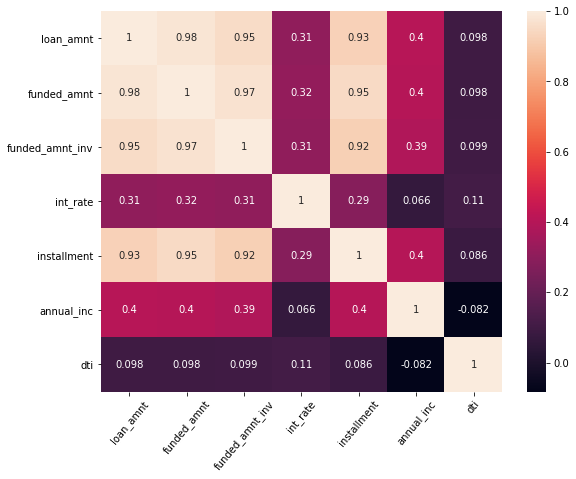

In [116]:
# To discover the relationship between loan amount requested vs funded Amount to see if LC ever issues lower amount

corColumns = ['loan_amnt','funded_amnt','funded_amnt_inv',
              'int_rate','installment','annual_inc','dti']

corrRelation = lc_df[corColumns].corr()

f,ax = plt.subplots(figsize= (9,7))

sns.heatmap(corrRelation,xticklabels = corrRelation.columns.values,yticklabels= corrRelation.columns.values, annot = True)
plt.xticks(rotation=50)
plt.show()

<font color = blue> Insights: It is clear from the Heatmap that how 'loan_amnt','funded_amnt' & 'funded_amnt_inv' are closely interrelated.

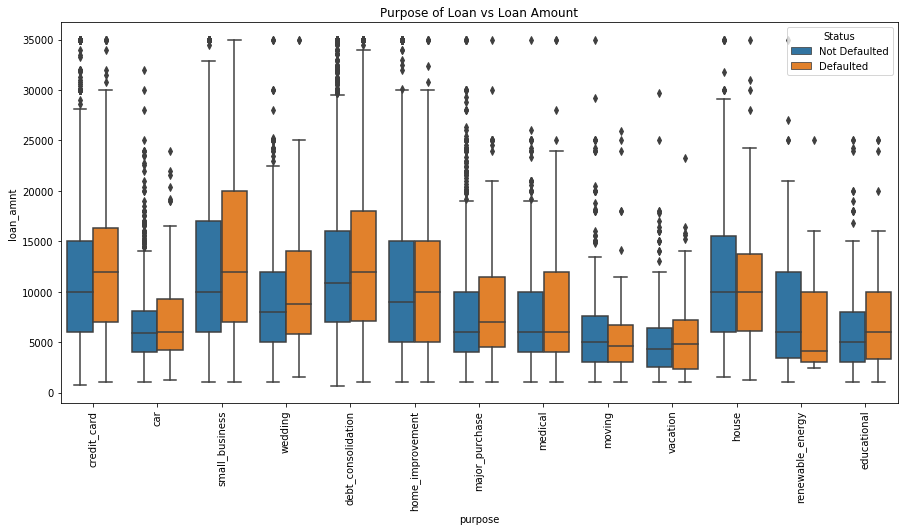

In [117]:
#Purpose of Loan Vs LoanAmount

plt.figure(figsize=(15,7))
g=sns.boxplot(data =lc_df, x='purpose', y='loan_amnt', hue ='Status')
plt.xticks(rotation=90)
plt.title('Purpose of Loan vs Loan Amount')
plt.show()

<font color = blue> Insights: Applicants who has taken the Loan for 'Debt Consolidation' has the highest charge off

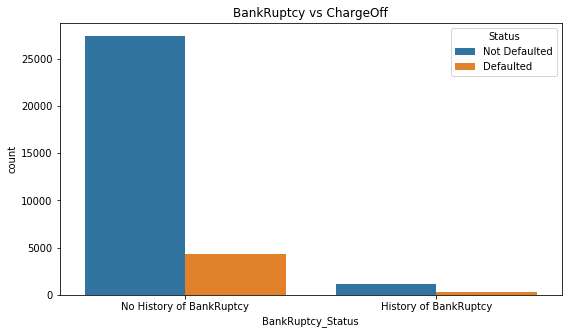

In [118]:
# BankRuptcy vs ChargeOff

plt.figure(figsize=(9,5))
g=sns.countplot(data =lc_df, x='BankRuptcy_Status',hue ='Status')
plt.title('BankRuptcy vs ChargeOff')
plt.show()

<font color = blue> Insights: Surprisingly Most of the defaulters has no history of Bankruptcy

### Probability of Defaulting the Loan Amount

## User Defined Functions for probability

In [119]:
# To Create the Summary table with new Probability Column
def summaryTable(df,col):
    df = pd.crosstab(df[col], df['loan_status'],margins=True)
    df['Probability_Charged Off'] = round((df['Charged Off']/df['All']),3)
    df = df[0:-1]
    return df

# Plot Probability Graph
def probPlot(df,col,stacked= True):
    plotsummaryTab = summaryTable(df,col)
    linePlot = plotsummaryTab[['Probability_Charged Off']]      
    barPlot =  plotsummaryTab.iloc[:,0:2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked)
    ax.set_title(df[col].name.title()+' vs Probability of Default',fontsize=20,weight="bold")
    ax.set_xlabel(df[col].name.title(),fontsize=14)
    ax.set_ylabel('Probability of Default',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)
    plt.show()

###  Location vs Probability of Default

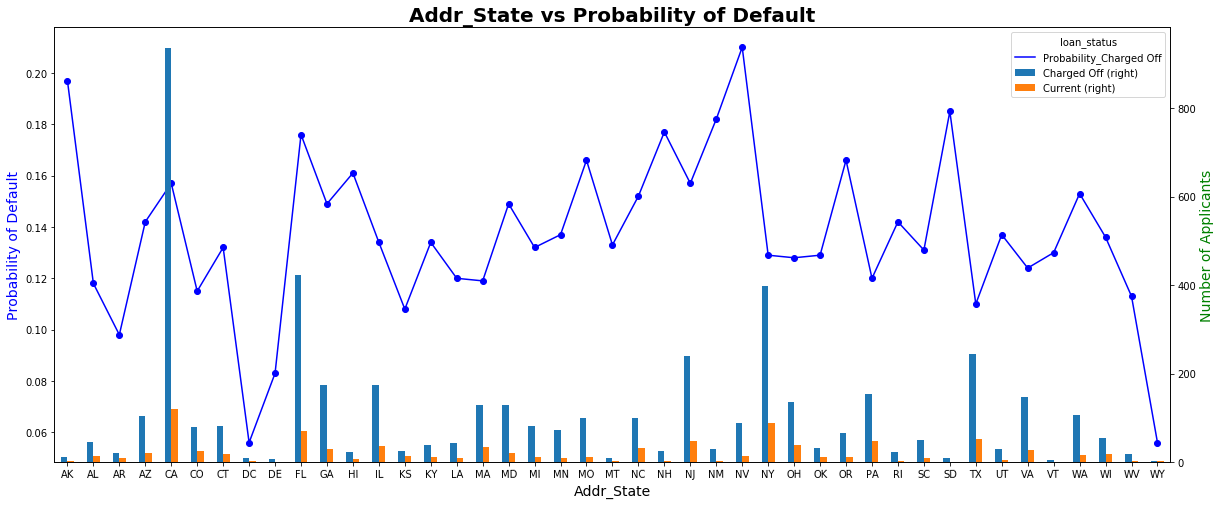

In [120]:
cols = lc_df.loc[lc_df.addr_state.isin((lc_df.addr_state.value_counts()[(lc_df.addr_state.value_counts() > 20)]).index)]
probPlot(df =cols,col ='addr_state',stacked=False)

<font color = blue>Insights: There are multiple States/Provinces with high probability of charge,highest being 'NV'.</Font>

###   Purpose of Loan vs Probability of Default

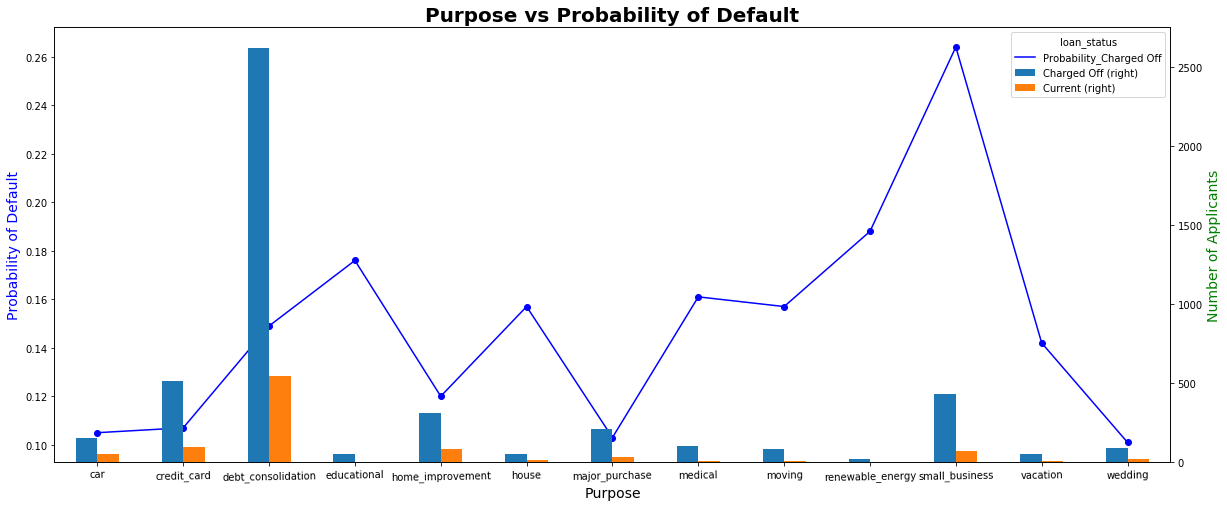

In [121]:
probPlot(df =lc_df,col ='purpose',stacked=False)

<font color = blue>Insights: Applicants who has taken the Loan for 'Small Business' has the highest probabilty of charge off of 26%. So bank should take extra caution like take some asset or guarentee while approving the loan for purpose like 'Small Business'</Font>

###  Grade vs Probability of Default

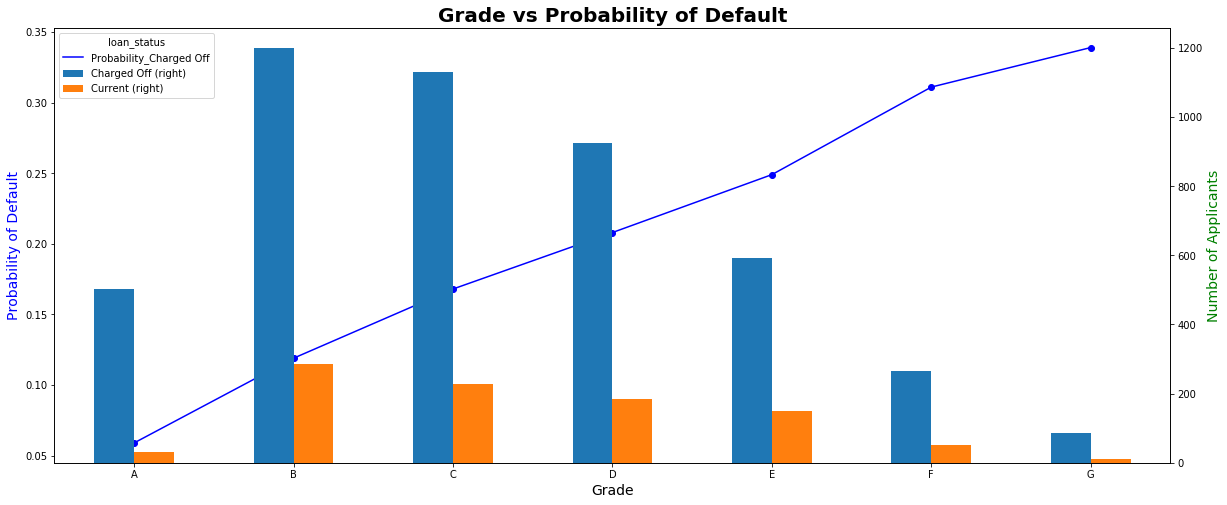

In [122]:
probPlot(df =lc_df,col ='grade',stacked=False)

<font color = blue>Insights: As we move from Grade A to G, probability that person will charged off is increasing.</Font>

### Sub - Grade vs Probability of Default

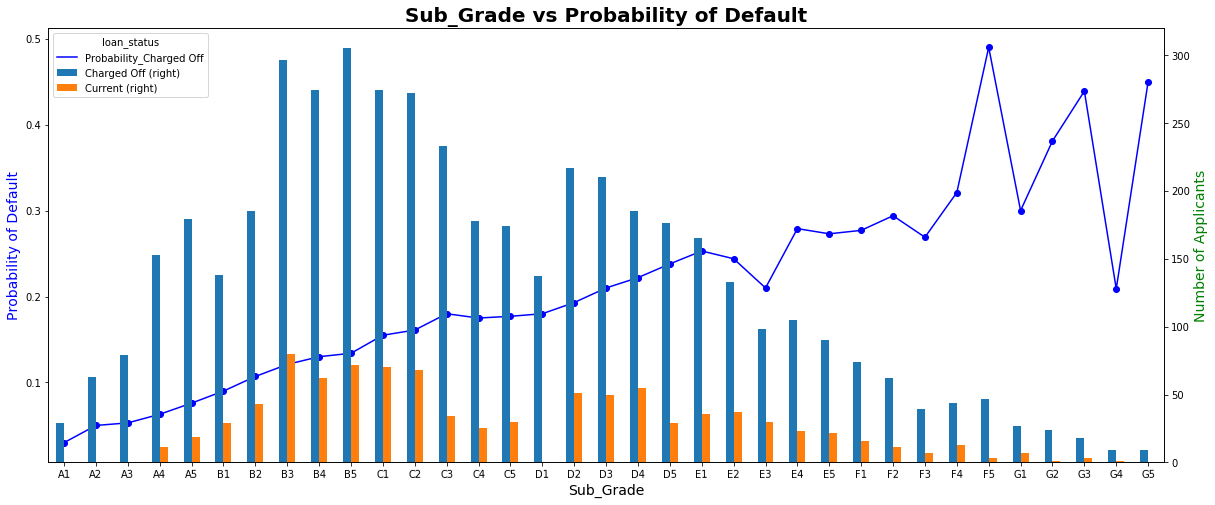

In [123]:
probPlot(df =lc_df,col ='sub_grade',stacked=False)

<font color = blue>Insights: As we move from Grade A to G, probability that person will charged off is increasing.</Font>

###   Annual Income Range vs Probability of Default

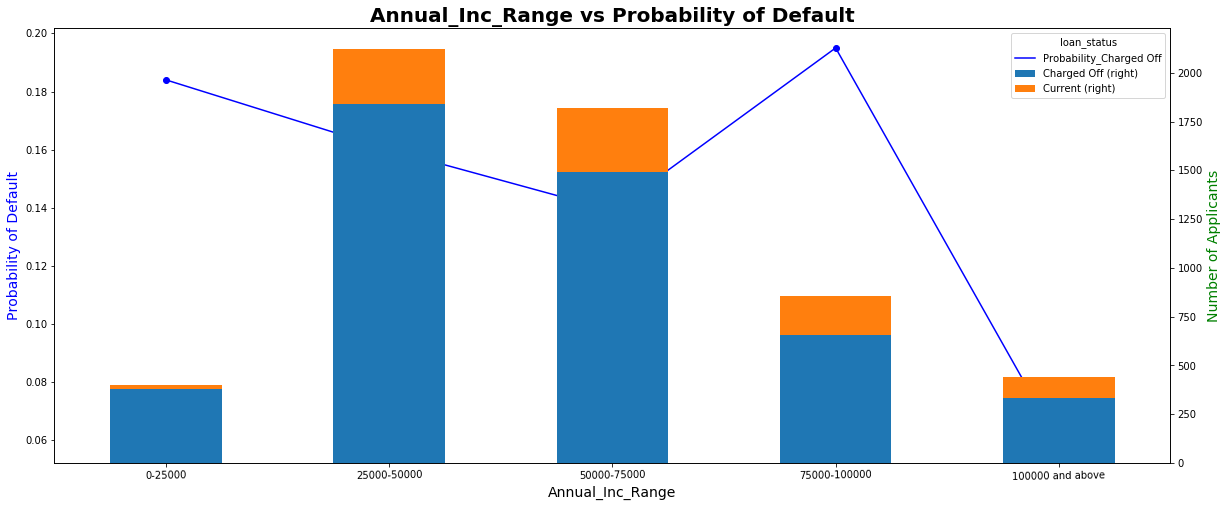

In [124]:
probPlot(df =lc_df,col ='annual_inc_range',stacked = True)

<font color = blue>Insights: The higher chance of prbability of defaultors is between 75000 - 100000</Font>

###  Interest rate Range vs Probability Default

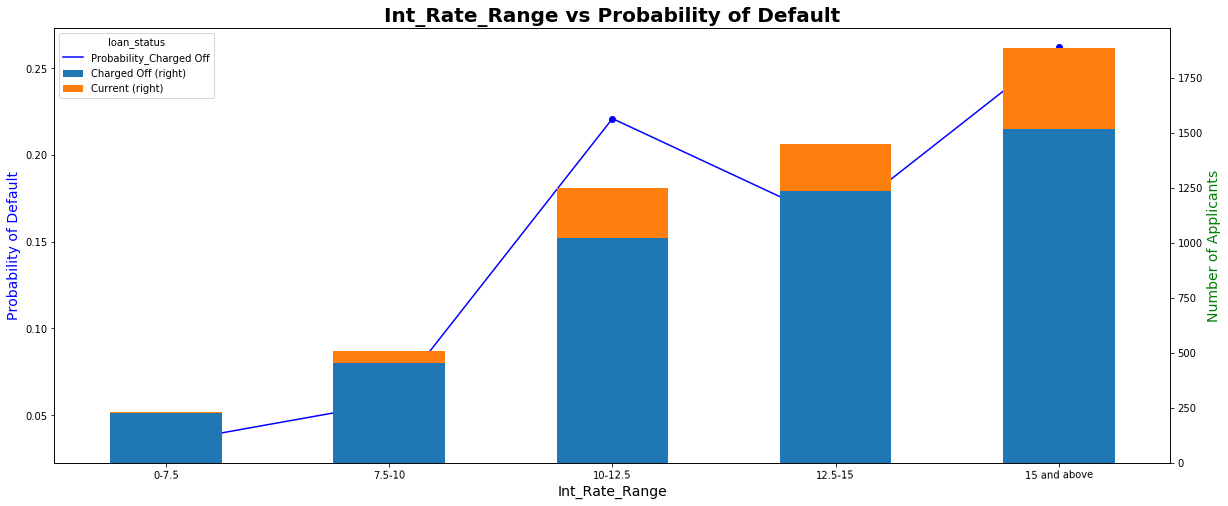

In [125]:
probPlot(df =lc_df,col ='int_rate_range',stacked = True)

<font color = blue>Insights: As the interest rate is increasing the probability that person will default is increasing with highest of 11% at 15% & above bracket.</Font>

##### Analysis of dti for interest rate range, loan default category and term

In [126]:
dti_pvt_df = pd.pivot_table(lc_df, index=["int_rate_range"], values="dti", columns=["Status","term"], aggfunc=[np.median])
dti_pvt_df.columns = dti_pvt_df.columns.droplevel(0)

print("\ndti values for each term and interest rate range for each default category, are shown below.\n\nThis influences whether a loan is likely to be defaulted or not.\n")

dti_pvt_df


dti values for each term and interest rate range for each default category, are shown below.

This influences whether a loan is likely to be defaulted or not.



Status          Defaulted            Not Defaulted           
term            36 months  60 months     36 months  60 months
int_rate_range                                               
0-7.5               13.06      10.44         11.74      12.72
7.5-10              14.48      13.10         12.48      12.28
10-12.5             14.43      14.14         13.77      14.12
12.5-15             14.50      15.25         14.30      14.84
15 and above        13.18      15.52         13.76      15.36

### Top- driven factors to consider for loan defaultors identification:
    1) Purpose of Loan
    2) Location
    3) Interest Rate
    4) dti
    5) Term for loan (term)

# Summary

#### Purpose of Loan:
            Applicants who has taken the Loan for 'Small Business' has the highest probabilty of charge off of 26%. So bank should take extra caution like take some asset or guarentee while approving the loan for purpose like 'Small Business'

#### Location:
            There are multiple States/Provinces with high probability of charge,highest being 'NV'

#### Interest Rate:
            As the interest rate is increasing the probability that person will default is increasing with highest of 11% at 15% & above bracket

#### dti:
            If Debt to income ratio is more then applicants have higher changes of defaulting. For example, in interest rate range of 20-25% and term 60 months, if dti is more than 14% then applicant will have higher chances of defaulting.

#### Term for loan (term):
            Loans with term of 60 months, have higher chances of defaulting.
          